In [13]:
import sys
import time
import chembl_downloader
from chembl_downloader.contrib import get_target_smi_df
import pandas as pd
from tqdm.auto import tqdm
import pystow
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import matplotlib_inline
import zipfile

In [2]:
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [3]:
print(sys.version)

3.10.8 (main, Oct 13 2022, 10:17:43) [Clang 14.0.0 (clang-1400.0.29.102)]


In [4]:
print(time.asctime())

Sun Oct 30 21:48:51 2022


Table 1 from [*Deep Confidence: A Computationally Efficient Framework for Calculating Reliable Prediction Errors for Deep Neural Networks*](https://pubs.acs.org/doi/10.1021/acs.jcim.8b00542) by Cortés-Ciriano (https://twitter.com/isidrolauscher) and Bender (https://twitter.com/AndreasBenderUK).

![]("cortes-cirano-table-1.png")

In [5]:
mappings = [
    ("A2a", "CHEMBL1867", 203),
    ("ABL1", "CHEMBL1862", 773),
    ("Acetylcholinesterase", "CHEMBL220", 3159),
    ("Aurora-A", "CHEMBL4722", 2125),
    ("B-raf", "CHEMBL5145", 1730),
    ("Cannabinoid", "CHEMBL218", 1116),
    ("Carbonic", "CHEMBL205", 603),
    ("Caspase", "CHEMBL2334", 1606),
    ("Coagulation", "CHEMBL204", 1700),
    ("COX-1", "CHEMBL221", 1343),
    ("COX-2", "CHEMBL230", 2855),
    ("Dihydrofolate", "CHEMBL202", 584),
    ("Dopamine", "CHEMBL217", 479),
    ("Ephrin", "CHEMBL222", 1740),
    ("erbB1", "CHEMBL203", 4868),
    ("Estrogen", "CHEMBL206", 1705),
    ("Glucocorticoid", "CHEMBL2034", 1447),
    ("Glycogen", "CHEMBL262", 1757),
    ("HERG", "CHEMBL240", 5207),
    ("JAK2", "CHEMBL2971", 2655),
    ("LCK", "CHEMBL258", 1352),
    ("Monoamine", "CHEMBL1951", 1379),
    ("opioid", "CHEMBL233", 840),
    ("Vanilloid", "CHEMBL4794", 1923),
]

## Load Old Data

In [6]:
url = "https://pubs.acs.org/doi/suppl/10.1021/acs.jcim.8b00542/suppl_file/ci8b00542_si_001.zip"
# path = pystow.ensure("cheminf", url=url)
path = "../data/ci8b00542_si_001.zip"

In [65]:
old_dfs = {}
with zipfile.ZipFile(path) as zip_file:
    for stem, target_chembl_id, _ in tqdm(mappings, unit="file"):
        with zip_file.open(f"Datasets/{stem}.sdf") as file:
            rows = [
                (
                    Chem.MolToSmiles(molecule),
                    molecule.GetProp("ChEMBL_ID"),
                    float(molecule.GetProp("pIC50")),
                )
                for molecule in tqdm(
                    Chem.ForwardSDMolSupplier(file),
                    desc=f"{target_chembl_id}",
                    leave=False,
                    unit="molecule",
                    unit_scale=True,
                )
            ]
        old_df = old_dfs[target_chembl_id] = pd.DataFrame(
            rows,
            columns=[
                "canonical_smiles",
                "molecule_chembl_id",
                "pchembl_value",
            ],
        )

  0%|          | 0/24 [00:00<?, ?file/s]

CHEMBL1867: 0.00molecule [00:00, ?molecule/s]

CHEMBL1862: 0.00molecule [00:00, ?molecule/s]

CHEMBL220: 0.00molecule [00:00, ?molecule/s]

CHEMBL4722: 0.00molecule [00:00, ?molecule/s]

CHEMBL5145: 0.00molecule [00:00, ?molecule/s]

CHEMBL218: 0.00molecule [00:00, ?molecule/s]

CHEMBL205: 0.00molecule [00:00, ?molecule/s]

CHEMBL2334: 0.00molecule [00:00, ?molecule/s]

CHEMBL204: 0.00molecule [00:00, ?molecule/s]

CHEMBL221: 0.00molecule [00:00, ?molecule/s]

CHEMBL230: 0.00molecule [00:00, ?molecule/s]

CHEMBL202: 0.00molecule [00:00, ?molecule/s]

CHEMBL217: 0.00molecule [00:00, ?molecule/s]

CHEMBL222: 0.00molecule [00:00, ?molecule/s]

CHEMBL203: 0.00molecule [00:00, ?molecule/s]

CHEMBL206: 0.00molecule [00:00, ?molecule/s]

CHEMBL2034: 0.00molecule [00:00, ?molecule/s]

CHEMBL262: 0.00molecule [00:00, ?molecule/s]

CHEMBL240: 0.00molecule [00:00, ?molecule/s]

CHEMBL2971: 0.00molecule [00:00, ?molecule/s]

CHEMBL258: 0.00molecule [00:00, ?molecule/s]

CHEMBL1951: 0.00molecule [00:00, ?molecule/s]

CHEMBL233: 0.00molecule [00:00, ?molecule/s]

CHEMBL4794: 0.00molecule [00:00, ?molecule/s]

## Refresh Data

In [71]:
version = chembl_downloader.latest()
new_dfs = {}
rows = []
for abbr, target_chembl_id, old in tqdm(mappings):
    df = new_dfs[target_chembl_id] = get_target_smi_df(
        target_chembl_id,
        version=version,
        aggregate=None,
    )
    new = len(df.index)
    rows.append((abbr, target_chembl_id, old, new, new - old))

summary_df = pd.DataFrame(
    rows,
    columns=["abbrevation", "target_chembl_id", "old_count", "new_count", "delta"],
)
summary_df

  0%|          | 0/24 [00:00<?, ?it/s]

,abbrevation,target_chembl_id,old_count,new_count,delta
0,A2a,CHEMBL1867,203,1271,1068
1,ABL1,CHEMBL1862,773,4313,3540
2,Acetylcholinesterase,CHEMBL220,3159,6757,3598
3,Aurora-A,CHEMBL4722,2125,3800,1675
4,B-raf,CHEMBL5145,1730,5858,4128
5,Cannabinoid,CHEMBL218,1116,7303,6187
6,Carbonic,CHEMBL205,603,11687,11084
7,Caspase,CHEMBL2334,1606,2227,621
8,Coagulation,CHEMBL204,1700,5973,4273
9,COX-1,CHEMBL221,1343,1993,650


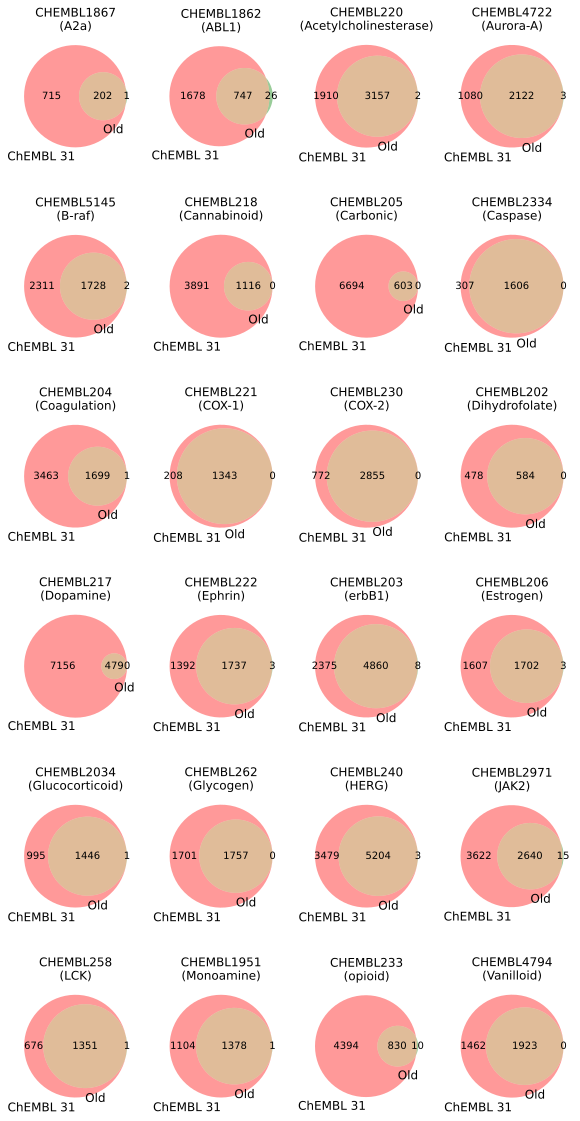

In [72]:
fig, axes = plt.subplots(6, 4, figsize=(10.0, 20.0))

for (name, target_id, _), ax in zip(mappings, axes.ravel()):
    venn2(
        [
            set(new_dfs[target_id].molecule_chembl_id),
            set(old_dfs[target_id].molecule_chembl_id),
        ],
        [f"ChEMBL {version}", "Old"],
        ax=ax,
    )
    ax.set_title(f"{target_id}\n({name})")
plt.show()

In [73]:
molecule_chembl_id = "CHEMBL222"

i = sorted(set(
    new_dfs[molecule_chembl_id].molecule_chembl_id).intersection(
        old_dfs[molecule_chembl_id].molecule_chembl_id
))

In [77]:
idx = new_dfs[molecule_chembl_id].molecule_chembl_id.isin(i)
aa = new_dfs["CHEMBL222"][idx].sort_values("molecule_chembl_id")
aa

,assay_chembl_id,canonical_smiles,molecule_chembl_id,pchembl_value
418,CHEMBL1020015,COc1cccc(C(CN(C)C)C2(O)CCCCC2)c1,CHEMBL101055,6.50
419,CHEMBL1020016,COc1cccc(C(CN(C)C)C2(O)CCCCC2)c1,CHEMBL101055,6.68
428,CHEMBL751376,Cc1ccc([C@H]2C[C@H]3CCC4C2[C@](C)(O)CN43)cc1,CHEMBL101250,6.53
376,CHEMBL1909094,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,CHEMBL1016,5.51
377,CHEMBL1909094,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,CHEMBL1016,5.52
...,...,...,...,...
347,CHEMBL1909094,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,CHEMBL990,5.41
420,CHEMBL1020015,CN(C)CC(c1cccc(C(F)(F)F)c1)C1(O)CCCCC1,CHEMBL99653,7.68
421,CHEMBL1020016,CN(C)CC(c1cccc(C(F)(F)F)c1)C1(O)CCCCC1,CHEMBL99653,7.50
422,CHEMBL930494,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,CHEMBL99946,7.40


In [78]:
idx = old_dfs[molecule_chembl_id].molecule_chembl_id.isin(i)
bb = old_dfs["CHEMBL222"][idx].sort_values("molecule_chembl_id")
bb

,canonical_smiles,molecule_chembl_id,pchembl_value
683,COc1cccc(C(CN(C)C)C2(O)CCCCC2)c1,CHEMBL101055,6.68
79,Cc1ccc(C2CC3CCC4C2C(C)(O)CN34)cc1,CHEMBL101250,6.53
1309,CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...,CHEMBL1016,5.51
681,CN(C)CC(c1cccc(Cl)c1)C1(O)CCCCC1,CHEMBL101899,6.92
81,C=C1CN2C3CCC2C1C(c1ccc(C)cc1)C3,CHEMBL101905,8.66
...,...,...,...
1387,Cc1oncc1C(=O)Nc1ccc(C(F)(F)F)cc1,CHEMBL960,5.33
1342,CCN(CC)C(=S)SSC(=S)N(CC)CC,CHEMBL964,4.15
1311,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,CHEMBL990,5.41
679,CN(C)CC(c1cccc(C(F)(F)F)c1)C1(O)CCCCC1,CHEMBL99653,7.50


<AxesSubplot: >

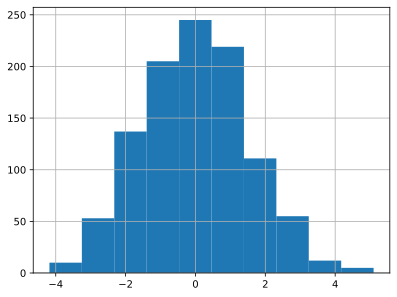

In [70]:
#idx = aa.pchembl_value.notna() & bb.pchembl_value.notna()

#aa[idx].pchembl_value - bb[idx].pchembl_value
aa.pchembl_value - bb.pchembl_value